# Correlacion y Convolucion.
## Introduccion. En algebra multilineal hay una cantidad de productos

* producto interno
* prodcuto externo (tensorial)
* producto cruz
* producto Hadamard.

La motivacion es la siguiente. Queremos encontrar la similitud entre dos objetos (vectores $x \in \mathbb{R}^n,y \in \mathbb{R}^n$). Una fomra de obnetera es
mediante la ecuacion  $\| x - y \| < \epsilon$.
Hay una metrica mejor que esta para medir la similitud,

Este es

$$\langle x, y \rangle = x \cdot y =x^T y = \sum_i x_i y_i = \| x \| \| y \| \cos \theta $$
Lo dejo como ejercicio.

¿Por que esta medida de "similaridad" es mejor que la anterior.?
Cundo estamos hablando de senales, importa mas la fase que la amplitud, en el sentido de que la fase me da forma y la amplitud el tamano. Por ejemplo, una imagen suya (una fotografica) es plenamente identificable si los colores son fuertes o debiles. Lo que importa es el contraste entre ellos, que es lo que determina la forma.  Es decir, que ambas senales suben y bajan al tiempo, que estan sincronizadas.

Cuando el angulo entre los dos vectores es $0$ esta la mayor similitud


Por ejemplo

\begin{eqnarray}
x = \begin{pmatrix} 1 \\ - 10 \\ 5  \end{pmatrix}
\quad , \quad
y = \begin{pmatrix} 10 \\ - 100 \\ 50  \end{pmatrix}
\end{eqnarray}
Estos vectores tiene una gran diferencia en magnitud ($y$ es 10 veces mas grande que $x$ pero que pasa con la fase entre ellos?
El angulo entre ellos.

$$ \cos \theta = \frac{x \cdot y }{\| x \| \| y \|}. $$

$$  
 \begin{pmatrix} 1 \\ - 10 \\ 5  \end{pmatrix} \cdot
 \begin{pmatrix} 10 \\ - 100 \\ 50  \end{pmatrix}
 =10  + 1000 + 250 = 1260$$


 $$ \| x \| = \sqrt{1 + 100 + 25} = 11. $$
 $$ \| y \| = \sqrt{1000 + 10000 + 2500} = 112 $$

 o sea que $\cos \theta \approx 1$. Esto indica $\theta=0$. Es decir que aunque los vectores son distintos en amplitud oscilan de igual forma.
 En las notas tengo que

 $$ \| x - y \|  \approx 101.02 .$$
 Ahora bien en vez de $\cos \theta$, ignorando el denominador vamos a quedarnos con el producto interno como metrica $x \cdot y$, al fin y al cabo muchas veces nosotros (en ML) normalizamos los vectores.

 Viene el siguiente experimento. Asuma dos senales parecidas pero con un corrimiento (shift). Se puede usar el principio del producto interno explicado arriba para encontrar el corrimiento.  Esto lo vemos enseguida.

 Asuma que una senal es $f(t) = a_1 \cos (t + \phi)$ y la otra senal es $g(t) = a_2 \cos t$. La amplitud de la segunda se puede obtener multiplicando la primera por $a_2/a_1$. Esto no es un "big deal". Pensemos mas bien como obtenere el parametro $\phi$ (desface). La idea para obtener $\phi$ es usar el producto interno pero desplazarlo a pedacitos. Ver notas a mano alzada.

 Que es el producto interno entre dos funciones, $x(t), y(t)$?

 $$ \langle x, y \rangle = \int_D x(t) y(t) dt  $$

 $$ \| x \| = \sqrt{ \langle x, x \rangle} = \left ( \int_D x^2(t) dt\right )^{1/2}$$. Esta es la normal $L_2$ de $x$.
 Observe que si discretiza la integral llega al producto interno como definimos en el curso ML.
 Mejor dicho si tu vector es finito, el producto del curso de ML funciona bien. Si la funcion es continua nos vamos con esta definicion (Analisis Funcional). El analisis funcional es como la generalizacion del algebra lineal pero ya a funciones (ya los vectores son funciones.

 En el ejemplo de nuestras funciones $f(t), g(t)$ el truco es

 $$ h(\tau) = \langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) d \tau. $$






















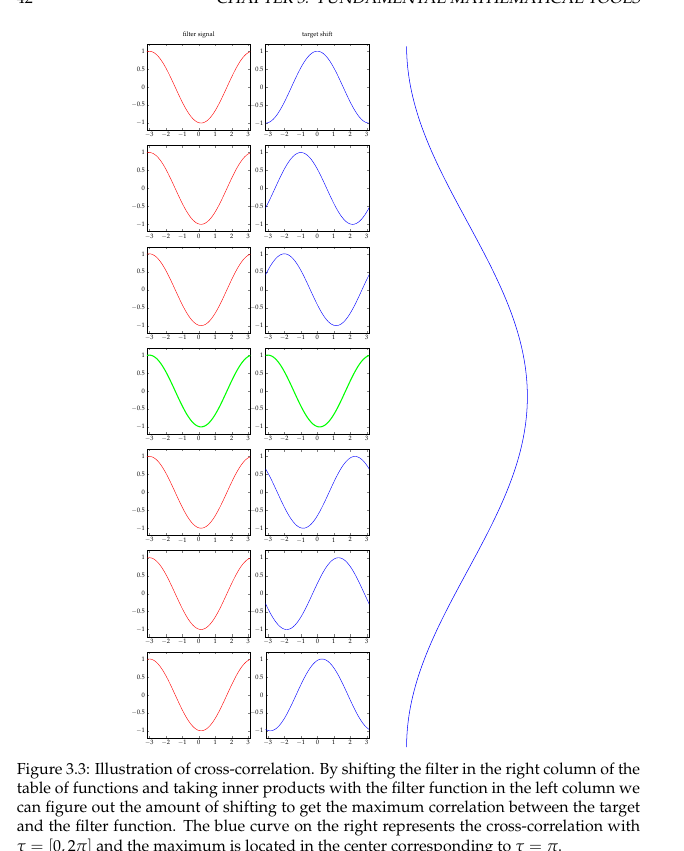

Analiticamente $f(t)= \cos (t + \phi)$ (rojo), $g(t)=\cos(t)$ (azul). El algoritmo esta dado por

* Calcular $h(\tau)$
$$ h(\tau) = \int_0^{2 \pi} f(t) g(t + \tau) dt = \int_0^{2 \pi} \cos(t + \phi) \cos(t + \tau) dt = \pi \cos(\tau - \phi) .$$

Si no tiene Wolfram Alpha, use esta identidad

$$\cos \alpha \cos \beta = \frac{\cos(\alpha + \beta) + \cos(\alpha - \beta)}{2} $$

* Hallar el maximo, la abcisa produce $\phi$.
El maximo de $\cos t$ es $\pi$, Esto pasa cuando $t=0$,
es decir $\tau = \phi$.

Nota: Si el angulos $\pi$ entonces el valor del $\cos \pi = -1$
y aca las senales estan opuestas: picos con valles y vice-versa.
Si el angulo es $\pi/2$ el $\cos \pi/2 = 0$ y tenemos ortogonalidad. Esto dice que las senales $f,g$ no tienen nigun
tipo de correlacion.

La funcion $h(\tau)$ se le llama **correlacion**. En la comunidad de ML a esto se le llama **convolucion** (error!!! ojo!!!)
Realmente la convolucion es la correlacion reversando el signo de $g$. Despues hablamos de convolucion. Por ahora usamos el simbolo de $\ast$ para la correlacion (aunque es convolucion).

Entonces definimos en (DL) (DL es parte de ML)

$h(\tau) = f(t) \ast g(t)$

La correlacion (convolucion para DL) sirve para encontrar similitudes entre funciones, esto incluye imagenes.



Vamos al discreto:
Tenemos dos secuencias de numeros (vectores) $x, y \in \mathbb{R}^n, \mathbb{R}^m$


La definicion de **convolucion** (en DL) es

$$z_j = ( x \ast y)  = \sum_i x_i y_{i+j} \tag{1} $$
No uso la notacion de Eistein.

Como programadores debemos saber donde se mueven $i,j$.

No podemos podemos correr $y$ a la derecha o izquierda hasta donde queramos. Hay limites.
Ensemos que las muestras de $x$ son $N_x$ y las muestras de $y$ son $N_y$. Entonces $i+j$ (no puede ser negativo, por que en nuestros codigos no existen indices negativos) pero tampoco
puede ser $i+j > N_y$ (out of bound error).

Entonces, matematicamente estamos diciendo

$$ 0 \le i + j < N_y  \quad , \text{con} \quad 0 \le i < N_x$$
De esta forma escribimos mas exactamente la eucacion (1) como

$$ z_j = x_i \ast y_i = \sum_{i=0}^{N_x-1} x_i y_{i+j} \quad, \quad j = 0, 1, \cdots,  N_y - N_x .$$

Las muestras de salide $z_j$ son $N_y - N_x + 1$. Si queremos mas muestras de salida tenemos que ampliar el vector $y$ con ceros al final. Veremos ejemplos. A esto se la llama en ingles **padding**.

Hay otro concepto, ademas de padding, que se llama **stride**
Como en DL los datos tienen tamanos enormes, queremos **brincar** muestras de salida para ahorrar memoria y procesamiento. Veamos como.


$$ z_j = x_i \ast y_i = \sum_{i=0}^{N_x-1} x_i y_{i+j} \quad, \quad j = 0, s, 2s,  \cdots, ks \quad ks \le  N_y - N_x .$$
Esto me ahora muchos datos, ya el numero de muestras de salida es $(N_y - N_x)/s + 1$.
En computacion estop implica que tenemos que mapear luego los indices $0 \mapsto 0$, $s \mapsto 1$, $2s \mapsto 2$, y asi.

Si queremos contar el total de puntos de salida, usamos la formula


$$\#(z_j) = \frac{N_y - N_x + 2p}{s} + 1 $$
$2p$ por que el padding se hace en los extremos de la senal.
Creo que es ejercicio probar esta formula.










# Proxima clase (rangos mayores. matrices, tensores de orden 2, etc)